# What Factors Are Influencing SAT Results in NYC High Schools?

It is common sense that some schools perform better than others. There is a lot a factors to take into account to explain this phenomena as the school reputation or location.

This study is the occasion to deep dive into identifying the elements that make a school better than another one. We will restrain our analysis on High Schools in New-York City with the target variable being the average score to the [SAT](https://en.wikipedia.org/wiki/SAT).

The city of New-York publishes various datasets about the city [here](https://opendata.cityofnewyork.us/). We are interested by numerous datasets under the **Education** theme:
- [2012 SAT Results](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)
- [Class Size - School-level detail](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
- [School Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j)
- [Directory of NYC High Schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2013-2014/u553-m549)
- [NYC General Education Survey Data](https://data.cityofnewyork.us/Education/2012-NYC-General-Education-School-Survey/xiyj-m4sj)

We will answer the following questions during our study
- Is there a relation between class size and SAT results?
- Is there a relation between high school location/neighborhood and SAT results?
    
Exploring the datasets might give us some new leads to understand the factors influencing the scores.

- conclusion

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 150 # Avoid truncated columns

### Load Datasets

In [2]:
sat_df = pd.read_csv('2012_SAT_Results.csv')
sat_df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [3]:
class_size_df = pd.read_csv('class_size.csv')
class_size_df.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [4]:
demographics_df = pd.read_csv('demographics.csv')
demographics_df.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,34,39,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,19.0,62.0,24.6,21,17,16,6.3,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,30,24,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,19.2,46.0,22.1,14,14,16,7.7,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [5]:
hs_directory_df = pd.read_csv('hs_directory.csv')
hs_directory_df.head()

,DBN,Boro,BN,Building Code,School_Phone_Number,Fax_Number,Printed_Name,Alphabetic_Name_Long,grade span 2014-2015 min,grade span 2014-2015 max,Expected grade span min,Expected grade span max,Last Year BUS?,BUS,Last Year SUBWAY?,SUBWAY,Primary_Address_Line_1,City,State_Code,Postcode,Total Student 10/26,Campus_Name,ELL Data,School_Accessibility_Description,First Priority01,Second Priority02,Third Priority03,Fourth Priority04,Fifth Priority05,Sixth Priority06,Seventh Priority07,Eighth Priority08,Ninth Priority09,Tenth Priority10,Eleventh Priority11,progcount,Email,Independent Website,School_Type,Overview Paragraph,Program Highlights,Language Classes,Advanced Placement Courses,Extra_Leadership&Support,PSAL Sports - Boys,PSAL Sports - Girls,PSAL Sports - Co-ed,School Sports,Import_Info - Drop Down,Import_Info - Free Text,Start Time,End Time,Open House Info,SE_Services,Online AP Courses,Online Language Courses,header01,footer01,School_Type2,Community Board,neighborhood,postalCode,precinct,school_district,latitude,longitude,loc,@context,@type,@id,Location 1,Borough,Council District,Census Tract,BIN,BBL,NTA
0,01M292,M,M292,M056,212-406-9411,212-406-9417,Henry Street School for International Studies,Henry Street School for International Studies,6.0,12,NaN,NaN,NaN,"M14AD, M15, M21, M22, M9",NaN,"J, M, Z to Delancey St-Essex St; F to East Br...",220 Henry Street,New York,NY,10002,388.0,NaN,ESL,Not Accessible,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,1,cloughl@schools.nyc.gov,http://schools.nyc.gov/schoolportals/01/M292,NaN,Henry Street School for International Studies ...,"Global/International Studies in core subjects,...","Chinese (Mandarin), Spanish",Psychology,"Math through Card Play, Poetry Club, Drama Clu...",Basketball,Softball,Soccer,"Boxing, CHAMPS, Double Dutch, Table tennis, Tr...",NaN,NaN,8:30 AM,3:30 PM,We cordially invite you to a guided tour of ou...,This school will provide students with disabil...,"Chinese Language and Culture, Spanish Literature","Chinese (Mandarin), Spanish",NaN,NaN,NaN,103,Lower East Side,10002,7,1,40.713481,-73.985321,"[-73.98532120000002,40.7134809]",http://schema.org,School,http://nyc.pediacities.com/Resource/School/hen...,"220 Henry Street\nNew York, NY 10002\n(40.7134...",MANHATTAN,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...
1,01M448,M,M448,M446,212-962-4341,212-267-5611,University Neighborhood High School,University Neighborhood High School,9.0,12,NaN,NaN,NaN,"M14AD, M15, M21, M22, M9",NaN,"J, M, Z to Delancey St-Essex St; F to East Br...",200 Monroe Street,New York,NY,10002,331.0,NaN,ESL; Transitional Bilingual Program: Chinese (...,Not Accessible,Open to New York City residents,For M35B only: Open only to students whose hom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,01M448@schools.nyc.gov,http://www.universityneighborhoodhs.com,NaN,We are a New York University/Department of Edu...,Core courses are available in Chinese (Mandari...,"Chinese, Spanish","Calculus AB, Chinese Language and Culture, Eng...","Basketball, Badminton, Handball, Dance, Fitnes...","Baseball, Basketball, Bowling, Cross Country, ...","Basketball, Bowling, Cross Country, Softball, ...",NaN,"Interscholastic Athletics, Fitness Center","Extended Day Program, Internship Requirement, ...",Students are encouraged to wear a shirt with t...,8:15 AM,3:15 PM,"Please call Lisa Ranson, our parent coordinato...",This school will provide students with disabil...,NaN,NaN,NaN,NaN,NaN,103,Lower East Side,10002,7,1,40.712235,-73.983823,"[-73.983823,40.712235]",http://schema.org,School,http://nyc.pediacities.com/Resource/School/uni...,"200 Monroe Street\nNew York, NY 10002\n(40.712...",MANHATTAN,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...
2,01M450,M,M450,M060,212-460-8467,212-260-9657,East Side Community School,East Side Community School,6.0,12,N

In [6]:
survey_df = pd.read_csv('school_survey.csv', skiprows=[1]) # Skip second line
survey_df.head()

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
1,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8.0,8.0,8.2
2,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
3,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7
4,01M063,P.S. 063 William Mckinley,Elementary School,58%,100%,NaN,8.5,7.4,7.6,7.8


## Data Preparation

In [7]:
# Convert to numeric for SAT results dataset
cols = ['Num of SAT Test Takers', 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']

for col in cols:
    sat_df[col] = pd.to_numeric(sat_df[col], errors='coerce')
    
# SAT score is the total of the 3 exams
sat_df['sat_score'] = sat_df['SAT Critical Reading Avg. Score'] + sat_df['SAT Math Avg. Score'] + sat_df['SAT Writing Avg. Score']
    
# Rows with NaN values are not useful so we remove them
sat_df = sat_df.dropna()

We need to find the DBN which is a combination of CSD and School code in order to merge the dataframes later on:

In [8]:
# Compute DBN (CSD must be padded)
class_size_df['DBN'] = class_size_df['CSD'].astype(str).str.zfill(2) + class_size_df['SCHOOL CODE']

Only grades 09-12 in general program are concerned with SAT so we need to filter the dataset accordingly:

In [9]:
class_size_df = class_size_df[(class_size_df['GRADE '] == '09-12') & (class_size_df["PROGRAM TYPE"] == "GEN ED")]

Because there are more than one class per school we need to aggregate the dataframe per DBN:

In [10]:
class_size_df = class_size_df.groupby('DBN').mean()
class_size_df.head()

,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,,
01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [11]:
# Only keep relevant rows in demographics
demographics_df = demographics_df[demographics_df['schoolyear'] == 20112012]

## Merge Datasets

In [12]:
print('Dataset size before merge: ', sat_df.shape[0])

combined_df = sat_df.merge(class_size_df, on='DBN', how='left')
combined_df = combined_df.merge(demographics_df, on='DBN', how='left')
combined_df = combined_df.merge(hs_directory_df, on='DBN', how='left')
combined_df = combined_df.merge(survey_df, on='DBN', how='left')

print('Dataset size after merge: ', combined_df.shape[0])

Dataset size before merge:  421
Dataset size after merge:  421


## Data Analysis

### Find correlations

In [13]:
correlations = combined_df.corr()['sat_score']
print(correlations.sort_values(ascending=False))

sat_score                            1.000000
SAT Writing Avg. Score               0.981016
SAT Critical Reading Avg. Score      0.974758
SAT Math Avg. Score                  0.953011
white_per                            0.651927
asian_per                            0.545374
Num of SAT Test Takers               0.482639
asian_num                            0.474959
white_num                            0.458223
NUMBER OF STUDENTS / SEATS FILLED    0.400095
AVERAGE CLASS SIZE                   0.395964
female_num                           0.395345
Total Student 10/26                  0.389255
total_enrollment                     0.377844
NUMBER OF SECTIONS                   0.364537
male_num                             0.338876
SIZE OF LARGEST CLASS                0.327099
SIZE OF SMALLEST CLASS               0.282388
Total Safety and Respect Score       0.280750
Total Academic Expectations Score    0.191302
progcount                            0.116365
female_per                        

It looks like some there are some correlations between the SAT score and the highschool demographics, the class size or the answers to the survey.
We are going to dive into those correlations.

### Class Size Influence on SAT Results

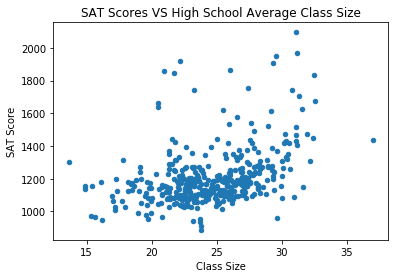

Pearson Correlation Coefficient for Average Class Size is: 0.39596397767241415


In [14]:
combined_df.plot(kind='scatter', x='AVERAGE CLASS SIZE', y='sat_score', title='SAT Scores VS High School Average Class Size')

plt.xlabel('Class Size')
plt.ylabel('SAT Score')
plt.show()

print('Pearson Correlation Coefficient for Average Class Size is:', correlations['AVERAGE CLASS SIZE'])

The Pearson correlation coefficient found for class size is quite unexpected as it correlates positively with SAT results. This means that class with higher number of students are more likely to have better SAT results. This is confirmed with the scatter plot above where classes with fewer students have lower SAT results and inversely.

In order to understand this tendency we will focus on class with few students to check for similarities:

In [15]:
combined_df[combined_df["AVERAGE CLASS SIZE"] < 17][['SCHOOL NAME', 'ell_percent', 'sped_percent', 'Overview Paragraph']]

,SCHOOL NAME,ell_percent,sped_percent,Overview Paragraph
9,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,8.0,32.2,Our students are educated in a Dual Language e...
11,ESSEX STREET ACADEMY,3.8,20.4,Essex Street Academy prepares all students for...
59,HARVEY MILK HIGH SCHOOL,1.5,22.1,NaN
108,INTERNATIONAL COMMUNITY HIGH SCHOOL,90.1,1.8,We are a community of English Language Learner...
148,BRONX INTERNATIONAL HIGH SCHOOL,87.1,1.2,The mission of the Bronx International High Sc...
207,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,92.9,0.2,We are a small learning community of recently-...
283,BROOKLYN BRIDGE ACADEMY,2.8,11.1,NaN
288,OLYMPUS ACADEMY,1.5,9.4,NaN
319,LIBERATION DIPLOMA PLUS,1.6,6.3,NaN


High schools with small classes have a higher number of English-Language Learner and/or Special Education Students which explains why their SAT scores are lower.

### Plotting Demographics Correlations

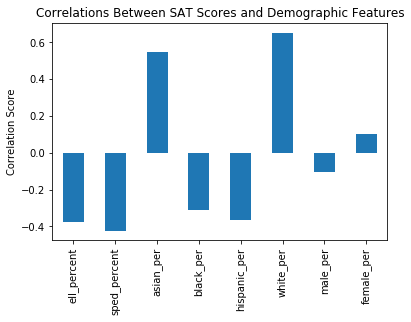

In [16]:
# Use percent columns instead of absolute number
demo_columns = ['ell_percent', 'sped_percent',
       'asian_per', 'black_per', 'hispanic_per', 'white_per',
       'male_per', 'female_per']

correlations[demo_columns].plot(
    kind='bar', rot=90, title='Correlations Between SAT Scores and Demographic Features')

plt.xlabel('')
plt.ylabel('Correlation Score')
plt.show()

Looking at the correlations scores we can already identify some tendencies:
- High schools with higher percentages of English-Language Learner (ELL) and Special Education (SPED) students have lower SAT scores.
- Student sex is not significantly correlated to SAT score but `female_per` is positively correlated to SAT scores wheareas `male_per`.
- High percentages of asian or white students correlates positively and strongly with high results whereas high percentages of hispanic or black students correlated negatively. This may be due to the lack of funding or safety in schools in some areas which are more likely to have a high percentage of hispanic or black students.

### Plotting Survey Correlations

In [17]:
survey_df.columns

Index(['DBN', 'School Name', 'School Type', 'Parent Response Rate',
       'Teacher Response Rate', 'Student Response Rate',
       'Total Safety and Respect Score', 'Total Communication Score',
       'Total Engagement Score', 'Total Academic Expectations Score'],
      dtype='object')

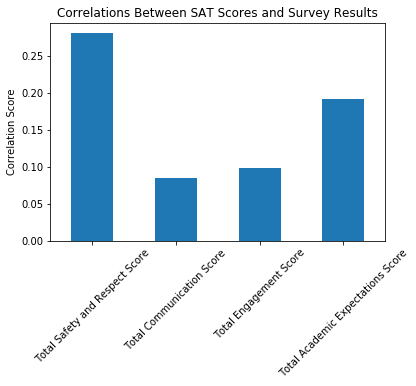

In [18]:
# Use percent columns instead of absolute number
survey_columns = ['Total Safety and Respect Score', 'Total Communication Score',
       'Total Engagement Score', 'Total Academic Expectations Score']

correlations[survey_columns].plot(
    kind='bar', rot=45, title='Correlations Between SAT Scores and Survey Results')

plt.xlabel('')
plt.ylabel('Correlation Score')
plt.show()

We can observe that survey results are positively correlated with SAT scores. 
The correlation is particularly strong with questions on:
- Safety which is rather logical because students working on a safe environment are more likely to succeed in school contrary to students feeling unsafe.
- Academic expectations as parents and students have higher expectations when their high school usually has good results.

Let's confirm these two hypothesis:

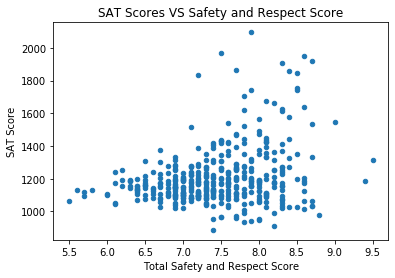

Pearson Correlation Coefficient for Safety and Respect Score is: 0.28074997616007613


In [19]:
combined_df.plot(kind='scatter', x='Total Safety and Respect Score', y='sat_score', title='SAT Scores VS Safety and Respect Score')

plt.xlabel('Total Safety and Respect Score')
plt.ylabel('SAT Score')
plt.show()

print('Pearson Correlation Coefficient for Safety and Respect Score is:', correlations['Total Safety and Respect Score'])

Although there is a tendency for students to have low SAT results when they don't feel safe in their school it does not systematicaly mean that schools with higher safety results have higher SAT scores.

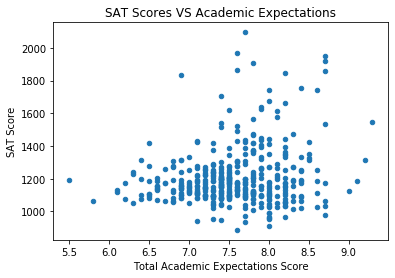

Pearson Correlation Coefficient for Safety and Respect Score is: 0.19130237542077186


In [20]:
combined_df.plot(kind='scatter', x='Total Academic Expectations Score', y='sat_score', title='SAT Scores VS Academic Expectations')

plt.xlabel('Total Academic Expectations Score')
plt.ylabel('SAT Score')
plt.show()

print('Pearson Correlation Coefficient for Safety and Respect Score is:', correlations['Total Academic Expectations Score'])

We can observe the same trend than for safety results: Although there is a tendency for students to have low SAT results when they don't high academic expectations it does not systematicaly mean that schools with higher academic expectations have higher SAT scores.

Plot safety per district

In [21]:
import folium
from matplotlib import cm
from matplotlib.colors import to_hex
from sklearn import preprocessing

m = folium.Map(
    location=[40.75, -73.90]
    , zoom_start=10)

# Group High School per district
district = combined_df.groupby('school_district').mean()

# Normalize safety for plotting color
district['normalized_safety'] = preprocessing.MinMaxScaler().fit_transform(district[['Total Safety and Respect Score']])

cmap = cm.get_cmap('YlOrBr_r') # Take inverted colormap --> from red to yellow

for _, row in district.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        tooltip='SAT Score: {sat_score:.0f} / Safety Score: {safety_score:.2f}'.format(
            sat_score=row['sat_score'], safety_score=row['Total Safety and Respect Score']),
        color=to_hex(cmap(row['normalized_safety'])),
        fill=True,
        fill_color=to_hex(cmap(row['normalized_safety']))
    ).add_to(m)

m

Looking at the map we observe that most of the district tend to have a similar safety score, although Brooklyn's is low.
When comparing the SAT scores for district with

## Conclusion